**Assignment 9 - Association Rules - Books**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

from mlxtend.preprocessing import TransactionEncoder

In [30]:
# Read csv file
df_books = pd.read_csv('book.csv')
df_books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


**Exploratory Data Analysis (EDA)**

In [31]:
df_books.shape

(2000, 11)

In [32]:
df_books[df_books.isna()].count()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [33]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [34]:
df_books[df_books.duplicated()].count()

ChildBks     1680
YouthBks     1680
CookBks      1680
DoItYBks     1680
RefBks       1680
ArtBks       1680
GeogBks      1680
ItalCook     1680
ItalAtlas    1680
ItalArt      1680
Florence     1680
dtype: int64

In [35]:
columns = df_books.columns
for i in columns:
  print(df_books[i].value_counts())

0    1154
1     846
Name: ChildBks, dtype: int64
0    1505
1     495
Name: YouthBks, dtype: int64
0    1138
1     862
Name: CookBks, dtype: int64
0    1436
1     564
Name: DoItYBks, dtype: int64
0    1571
1     429
Name: RefBks, dtype: int64
0    1518
1     482
Name: ArtBks, dtype: int64
0    1448
1     552
Name: GeogBks, dtype: int64
0    1773
1     227
Name: ItalCook, dtype: int64
0    1926
1      74
Name: ItalAtlas, dtype: int64
0    1903
1      97
Name: ItalArt, dtype: int64
0    1783
1     217
Name: Florence, dtype: int64


Observation: All columns are numerical columns with categorical data.

No null values exist.

Many duplicate records exists indicates that a few association rules can be extracted.

**Assoication Rules Extraction and Observations**

**Association Rules with minimum support: 0.1**

In [36]:
# Extract frequent item sets using apriori
frequent_items = apriori(df_books, min_support=0.1, max_len=None, use_colnames=True)

In [37]:
frequent_items.count()

support     39
itemsets    39
dtype: int64

In [38]:
#Extract rules
rules = association_rules(frequent_items, metric='lift', min_threshold=0.5 )
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [39]:
rules.sort_values('lift', ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [40]:
rules.count()

antecedents           100
consequents           100
antecedent support    100
consequent support    100
support               100
confidence            100
lift                  100
leverage              100
conviction            100
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d9c127490>,
      dtype=object)

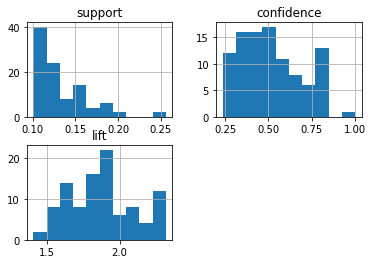

In [41]:
rules[['support', 'confidence', 'lift']].hist()

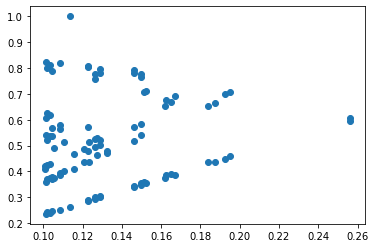

In [42]:
plt.scatter(rules['support'], rules['confidence'])

Observation: With minimum support level as 0.1, 100 associations can be extracted. Top 10 association rules are displayed. 

**Association Rules with minimum support: 0.2**

In [43]:
# Extract frequent item sets using apriori
frequent_items = apriori(df_books, min_support=0.2, max_len=None, use_colnames=True)

In [44]:
frequent_items.count()

support     8
itemsets    8
dtype: int64

In [45]:
#Extract rules
rules = association_rules(frequent_items, metric='lift', min_threshold=0.5 )
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [46]:
rules.sort_values('lift', ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [47]:
rules.count()

antecedents           2
consequents           2
antecedent support    2
consequent support    2
support               2
confidence            2
lift                  2
leverage              2
conviction            2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d9beca990>,
      dtype=object)

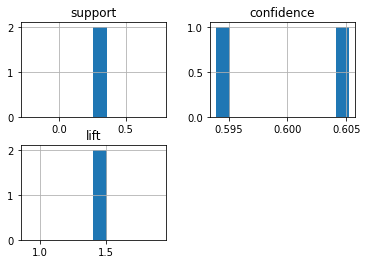

In [48]:
rules[['support', 'confidence', 'lift']].hist()

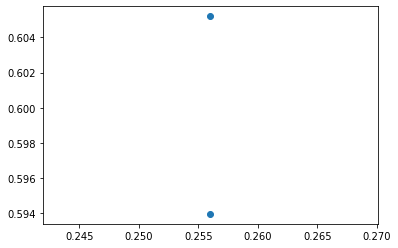

In [49]:
plt.scatter(rules['support'], rules['confidence'])

Observation: With minimum support level increased to 0.2, 100 associations were reduced to only 2 rules. 